In [8]:
import os
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
from copy import deepcopy
from tensorflow.keras.models import load_model
from utils import * 

In [2]:
# load data

folder = 'C:\\Users\\HP\\OneDrive - University of Louisiana Lafayette\\Documents\\Louisiana\\3. Fall 2024\\CSCE 566 - Data Mining\\Final Project\\Datasets\\Problem_5_Glaucoma_Detection_using_SLO_and_OCT_Fundus_Images'
flist = os.listdir(os.path.join(folder, 'Testing'))

glaucoma_map = {0:'Non-Glaucoma', 1:'Glaucoma'}

sample_data = np.load(os.path.join(folder, 'Testing', flist[650]))
for k in sample_data.keys():
    print(k)

oct_fundus
slo_fundus
age
gender
race
ethnicity
language
marriagestatus
md
glaucoma


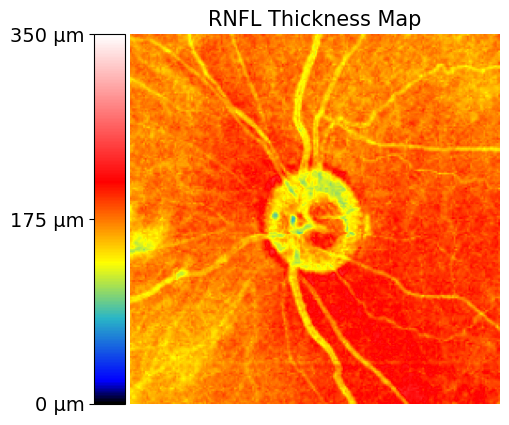

In [9]:
plot_2dmap(sample_data['oct_fundus'])

In [10]:
glaucoma_map[int(sample_data['glaucoma'])] # the sample image we want to predict is for a glaucoma patient

'Glaucoma'

**Fundus viewer**

In [4]:
def gen_cmap(N=10000):
    
    return matplotlib.colors.LinearSegmentedColormap.from_list("", [(0,'black'), (0.06,'blue'), 
                                                                  (0.23, '#2ab6c6'), (0.38,'yellow'), 
                                                                  (0.6,'red'), (1,'white')], N=N)   



def plot_2dmap(img, show_colorbar=True, show_cup=False, with_ref=False, ref_img=None, delartifact=False, cm=None, title_on=True):
    if cm == None:
        cm = gen_cmap(256)
        
    img_copy2d = deepcopy(img)
    # mark the rim and cup regions by -1 and -2 locations
    if show_cup:
        img_copy2d[img_copy2d==-1] = np.nan
        cm.set_bad("gray")
        cm.set_under(color='lightgray')
    # mark rim and cup regions from reference img
    if with_ref:
        img_copy2d[ref_img==-2] = -2
        img_copy2d[ref_img==-1] = np.nan
        cm.set_bad(color="gray")
        cm.set_under(color='lightgray')
    # delete artifact locations defined by <=30 and >=0
    if delartifact:
        img_copy2d[(img_copy2d<=30) & (img_copy2d>0)] = 0
    fig = plt.figure()
    ax = plt.subplot(111)
    img_copy2d = ax.imshow(img_copy2d, cmap=cm, vmin=-0.00000001, vmax=350)
    if show_colorbar:
        cbar = plt.colorbar(img_copy2d, pad=0.01, aspect=12, location='left')
        cbar.set_ticks([0, 175,350])
        cbar.ax.set_yticklabels(['0 μm', '175 μm', '350 μm'])
        cbar.ax.tick_params(labelsize=14)
        if title_on:
            ax.set_title('RNFL Thickness Map', fontsize=15)
        ax.axis('off')
    else:
        ax.axis('off')
    plt.show()

**Load the pretrained model**

In [11]:
model = load_model('results/oct_predict_glaucoma_model.h5')

In [12]:
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, None, None, 3)       │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, None, None, 64)      │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, None, None, 64)      │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, None, None, 64)      │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, None, None, 128)     │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, None, None, 128)     │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, None, None, 128)     │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, None, None, 256)     │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, None, None, 256)     │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, None, None, 256)     │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, None, None, 256)     │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, None, None, 512)     │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, None, None, 512)     │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, None, None, 512)     │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, None, None, 512)     │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, None, None, 512)     │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, None, None, 512)     │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, None, None, 512)     │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, None, None, 512)     │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_1           │ (None, 512)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 512)                 │              

 Total params: 14,715,203 (56.13 MB)

 Trainable params: 14,715,201 (56.13 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [13]:
import cv2

img = cv2.resize(sample_data['oct_fundus'], (224,224))
img_input =  np.transpose(np.array([img, img, img]), (1, 2, 0))
img_inputs = np.array([img_input])

In [14]:
img_input.shape

(224, 224, 3)

In [15]:
pred_batch_y = model.predict(img_inputs, verbose=0)[0]
print(pred_batch_y)

predict_label = 1 if pred_batch_y >= 0.5 else 0

[0.7398116]


In [17]:
glaucoma_map[predict_label] # the model also predicted that the oct fundus is for a glaucoma patient

'Glaucoma'